In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
from google.colab import drive

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
directory_path = "/content/drive/MyDrive"
os.chdir(directory_path)

path_0 = "/content/drive/MyDrive/DSO 560/DSO 560 Group Project/Engineering_Prof.csv"
path_1 = "/content/drive/MyDrive/DSO 560/DSO 560 Group Project/Theater_Prof.csv"
path_2 = "/content/drive/MyDrive/DSO 560/DSO 560 Group Project/Business_Prof.csv"
path_3 = "/content/drive/MyDrive/DSO 560/DSO 560 Group Project/econ_prof.csv"
path_4 = "/content/drive/MyDrive/DSO 560/DSO 560 Group Project/CompSci_Prof.csv"

data_0 = pd.read_csv(path_0)
data_1 = pd.read_csv(path_1)
data_2 = pd.read_csv(path_2)
data_3 = pd.read_csv(path_3)
data_4 = pd.read_csv(path_4)
data = pd.concat([data_0, data_1, data_2, data_3, data_4], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,professor_name,school_name,department_name,star_rating,take_again,diff_index,Quality,Difficulty,post_date,name_onlines,attendance,for_credits,would_take_agains,grades,Online Class,Textbook,comments
0,Babak Boloury,University of Southern California,Engineering department,3.1,46%,3.8,1.0,5.0,"Sep 18th, 2023",ME2191,Not Mandatory,Yes,NaN,F,NaN,Yes,IDK man this guy gave me trauma. cried during ...
1,Babak Boloury,University of Southern California,Engineering department,3.1,46%,3.8,4.0,4.0,"May 25th, 2023",ME2191,Not Mandatory,Yes,Yes,B,NaN,N/A,This teacher has difficult midterms and finals...
2,Babak Boloury,University of Southern California,Engineering department,3.1,46%,3.8,2.0,5.0,"Jan 21st, 2023",ME2191,Not Mandatory,Yes,NaN,Rather not say,NaN,N/A,"While he knows how to teach the material, his ..."
3,Babak Boloury,University of Southern California,Engineering department,3.1,46%,3.8,2.0,3.0,"May 16th, 2022",AME408,Not Mandatory,Yes,NaN,B+,NaN,Yes,This professor was not accessible outside of c...
4,Babak Boloury,University of Southern California,Engineering department,3.1,46%,3.8,2.0,4.0,"Sep 4th, 2021",AME408,Not Mandatory,Yes,No,A,NaN,No,One of my least favorite AME professors at USC...


In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim import corpora, models
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
comments = data['comments'].astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Function for text preprocessing
import re
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(tokens)

# Apply the preprocessing function
processed_texts = comments.apply(preprocess_text)

# Prepare a list of texts for further processing
texts = [text.split() for text in processed_texts]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
processed_texts = comments.apply(preprocess_text)
print(processed_texts)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      idk man guy gave trauma cried exam great lectu...
1      teacher difficult midterm final however really...
2      know teach material homework test time consumi...
3      professor accessible outside class help asked ...
4      one least favorite ame professor usc boring le...
                             ...                        
633    easy get u little c background lab pa easy med...
634    averagelevel course student already java exper...
635     amazing professor strongly recommend take course
636                                                 good
637    well professor bono alright suggestion rephras...
Name: comments, Length: 638, dtype: object


In [ ]:
texts = [text.split() for text in processed_texts]
print(texts[:5])

[['idk', 'man', 'guy', 'gave', 'trauma', 'cried', 'exam', 'great', 'lecturer', 'exam', 'million', 'time', 'harder', 'lecture', 'nightmare', 'exam', 'scared', 'life'], ['teacher', 'difficult', 'midterm', 'final', 'however', 'really', 'learn', 'material', 'homework', 'timeconsuming', 'however', 'problem', 'helpful', 'office', 'hour', 'attendance', 'isnt', 'mandatory', 'lecture', 'super', 'helpful', 'understanding', 'material', 'wouldnt', 'recommend', 'missing'], ['know', 'teach', 'material', 'homework', 'test', 'time', 'consuming', 'honestly', 'whole', 'class', 'trouble', 'somewhat', 'belittles', 'question', 'material', 'recommend', 'choosing', 'different', 'professor', 'option'], ['professor', 'accessible', 'outside', 'class', 'help', 'asked', 'question', 'way', 'answered', 'question', 'terrible', 'ready', 'spend', 'ungodly', 'amount', 'time', 'homework', 'first', 'half', 'class', 'easy', 'prior', 'cad', 'experience', 'making', 'part', 'second', 'half', 'fea', 'terrible', 'poor', 'rubri

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(processed_texts)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Sentiment analysis of COVID-19 versus not COVID-19 (plus t test)

In [ ]:
import re

def remove_ordinal_suffix(date_str):

  return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)

data['post_date'] = data['post_date'].apply(remove_ordinal_suffix)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sentiments = processed_texts.apply(lambda x: TextBlob(x).sentiment.polarity)
sentiments_df = sentiments.to_frame(name='Sentiment Score')
sentiments_df.reset_index(inplace=True)  # Converts the index into a regular column
sentiments_df.rename(columns={'index': 'Comment Index'}, inplace=True)  # Renames the column to clearly indicate what it represents

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd

# Convert post_date as a date object
sentiments_df['post_date'] = data['post_date']
sentiments_df['post_date'] = pd.to_datetime(sentiments_df['post_date'], format='%b %d, %Y', errors='coerce')
sentiments_df['post_date'] = sentiments_df['post_date'].fillna(pd.to_datetime(sentiments_df['post_date'], format='%b %dst, %Y', errors='coerce'))
sentiments_df['post_date'] = sentiments_df['post_date'].fillna(pd.to_datetime(sentiments_df['post_date'], format='%b %dnd, %Y', errors='coerce'))
sentiments_df['post_date'] = sentiments_df['post_date'].fillna(pd.to_datetime(sentiments_df['post_date'], format='%b %drd, %Y', errors='coerce'))

# Set COVID-19 starting date
covid_start_date = pd.Timestamp('2020-03-01')
covid_end_date = pd.Timestamp('2022-08-01')

# Mark whether comments were made before or after COVID-19
sentiments_df['During Covid'] = sentiments_df['post_date'].between(covid_start_date, covid_end_date)


# The average score of sentiment before and after COVID-19
not_covid_avg_sentiment = sentiments_df[~sentiments_df['During Covid']]['Sentiment Score'].mean()
covid_avg_sentiment = sentiments_df[sentiments_df['During Covid']]['Sentiment Score'].mean()


print(f"Average sentiment not Covid: {not_covid_avg_sentiment}")
print(f"Average sentiment during Covid: {covid_avg_sentiment}")

Average sentiment not Covid: 0.1153001943697594
Average sentiment during Covid: 0.14282887370369693


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from scipy.stats import ttest_ind

# Separate the sentiment scores based on the 'During Covid' column
covid_scores = sentiments_df[sentiments_df['During Covid']]['Sentiment Score']
not_covid_scores = sentiments_df[~sentiments_df['During Covid']]['Sentiment Score']

# Perform a t-test between the two sets of scores
t_stat, p_value = ttest_ind(covid_scores, not_covid_scores, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Based on the p-value, determine if there is a significant difference
if p_value < 0.05:
    print("There is a significant difference in sentiment scores between COVID and not COVID periods.")
else:
    print("There is no significant difference in sentiment scores between COVID and not COVID periods.")

T-statistic: 1.1614432416390985
P-value: 0.24604598238571562
There is no significant difference in sentiment scores between COVID and not COVID periods.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


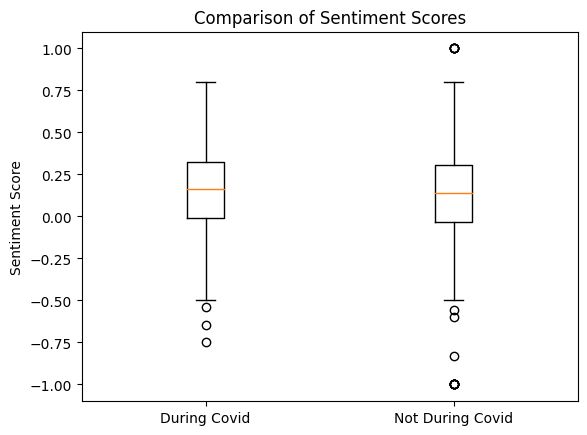

In [ ]:
covid_scores = sentiments_df[sentiments_df['During Covid']]['Sentiment Score']
not_covid_scores = sentiments_df[~sentiments_df['During Covid']]['Sentiment Score']

# Creating box plots
plt.boxplot([covid_scores, not_covid_scores], labels=['During Covid', 'Not During Covid'])
plt.title('Comparison of Sentiment Scores')
plt.ylabel('Sentiment Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


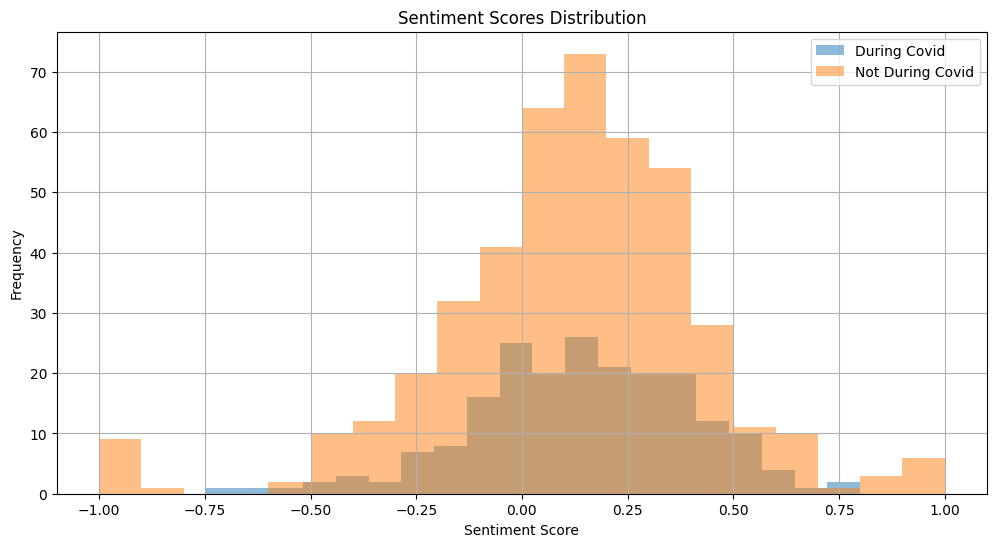

In [ ]:
# Separate the sentiment scores based on the 'During Covid' column
covid_scores = sentiments_df[sentiments_df['During Covid']]['Sentiment Score']
not_covid_scores = sentiments_df[~sentiments_df['During Covid']]['Sentiment Score']

plt.figure(figsize=(12, 6))

# Plot histogram for scores during Covid
plt.hist(covid_scores, alpha=0.5, bins=20, label='During Covid')

# Plot histogram for scores not during Covid
plt.hist(not_covid_scores, alpha=0.5, bins=20, label='Not During Covid')

# Add labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Scores Distribution')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# Separate the sentiment scores based on the 'During Covid' column
covid_scores = sentiments_df[sentiments_df['During Covid']]['Sentiment Score']
not_covid_scores = sentiments_df[~sentiments_df['During Covid']]['Sentiment Score']

# Perform a t-test between the two sets of scores
t_stat, p_value = ttest_ind(covid_scores, not_covid_scores, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Based on the p-value, determine if there is a significant difference
if p_value < 0.05:
    print("There is a significant difference in sentiment scores between COVID and not COVID periods.")
else:
    print("There is no significant difference in sentiment scores between COVID and not COVID periods.")

T-statistic: 1.1614432416390985
P-value: 0.24604598238571562
There is no significant difference in sentiment scores between COVID and not COVID periods.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Correlation between Sentiment Score and (Quality, Difficulty, and Letter Grade)

In [ ]:
sentiments_df['Quality'] = data['Quality']
sentiments_df['Difficulty'] = data['Difficulty']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
quality = sentiments_df['Quality']
senitment_score = sentiments_df['Sentiment Score']
difficulty = sentiments_df['Difficulty']

correlation_star = senitment_score.corr(quality)
correlation_diff = senitment_score.corr(difficulty)

print("The correlation between Star Rating and Sentiment Score is: ", correlation_star)
print("The correlation between Difficulty and Sentiment Score is: ", correlation_diff)

The correlation between Star Rating and Sentiment Score is:  0.5978731046194586
The correlation between Difficulty and Sentiment Score is:  -0.24662572366829505


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['grades'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([' F', ' B', ' Rather not say', ' B+', ' A', nan, ' C-', ' A+',
       ' A-', ' Not sure yet', ' Drop/Withdrawal', ' C',
       ' Audit/No Grade', ' B-', ' Incomplete', ' C+', ' D'], dtype=object)

In [ ]:
grade_mapping = {
    'A+': 4.0, 'A': 4.0, 'A-': 3.7,
    'B+': 3.3, 'B': 3.0, 'B-': 2.7,
    'C+': 2.3, 'C': 2.0, 'C-': 1.7,
    'D+': 1.3, 'D': 1.0, 'D-': 0.7,
    'F': 0.0
}

def convert_grade_to_score(grade):
    # Check if the value is a string and if so, clean it
    cleaned_grade = grade.strip().upper() if isinstance(grade, str) else grade
    # Return the mapped numeric score or NaN
    return grade_mapping.get(cleaned_grade, np.nan)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['Numeric_Scores'] = data['grades'].apply(convert_grade_to_score)
sentiments_df['Numeric_Scores'] = data['Numeric_Scores']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Grade = sentiments_df['Numeric_Scores']
correlation_grade = senitment_score.corr(Grade)

print("The correlation between Grade and Sentiment Score is: ", correlation_grade)

The correlation between Grade and Sentiment Score is:  0.27983866993072803


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


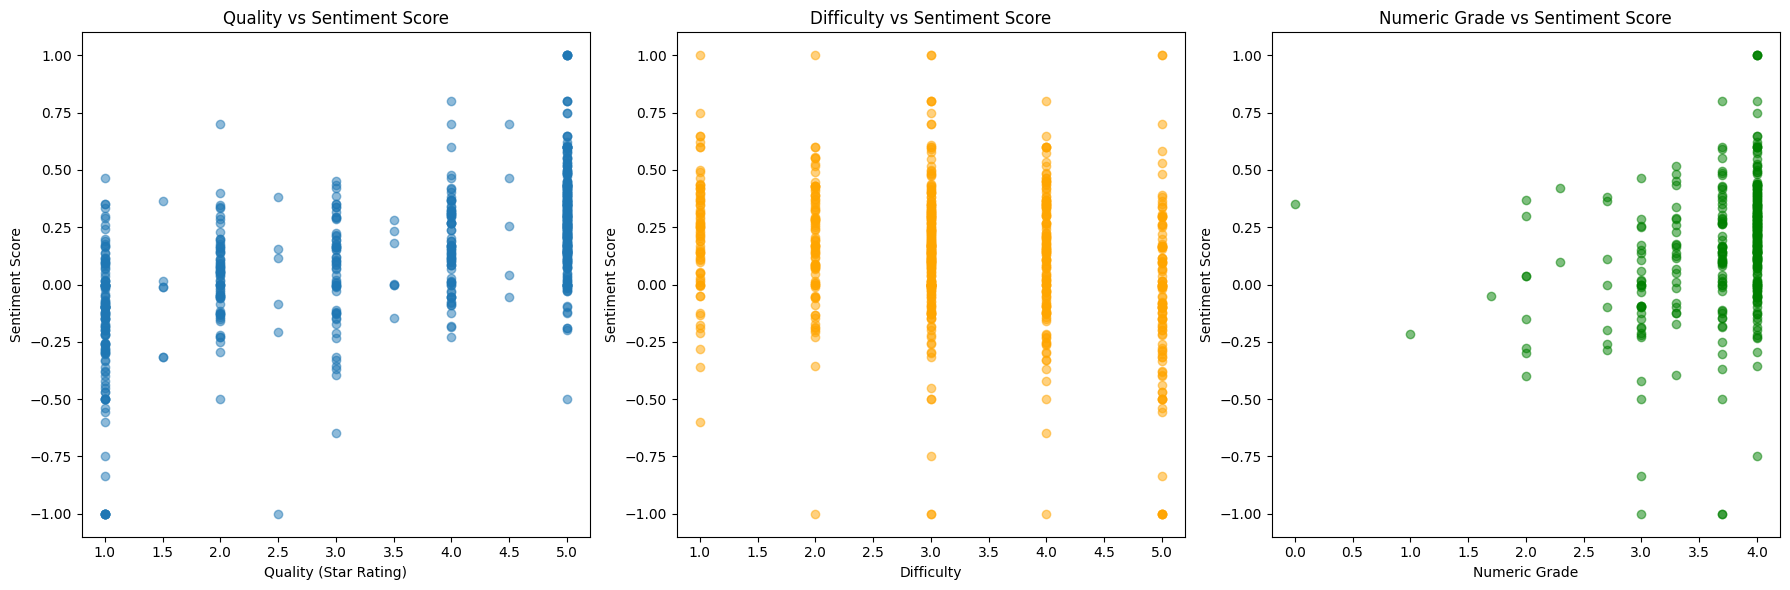

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for Quality vs Sentiment Score
axs[0].scatter(data['Quality'], sentiments_df['Sentiment Score'], alpha=0.5)
axs[0].set_title('Quality vs Sentiment Score')
axs[0].set_xlabel('Quality (Star Rating)')
axs[0].set_ylabel('Sentiment Score')

# Scatter plot for Difficulty vs Sentiment Score
axs[1].scatter(data['Difficulty'], sentiments_df['Sentiment Score'], alpha=0.5, color='orange')
axs[1].set_title('Difficulty vs Sentiment Score')
axs[1].set_xlabel('Difficulty')
axs[1].set_ylabel('Sentiment Score')

# Scatter plot for Numeric Grade vs Sentiment Score
axs[2].scatter(data['Numeric_Scores'], sentiments_df['Sentiment Score'], alpha=0.5, color='green')
axs[2].set_title('Numeric Grade vs Sentiment Score')
axs[2].set_xlabel('Numeric Grade')
axs[2].set_ylabel('Sentiment Score')

plt.tight_layout()
plt.show()

##The overall sentiment of the USC (Average sentiment across reviews)

In [ ]:
sentiments = processed_texts.apply(lambda x: TextBlob(x).sentiment.polarity)
sentiments

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      0.350000
1     -0.033333
2      0.000000
3     -0.122917
4     -0.024074
         ...   
633   -0.049405
634    0.350000
635    0.516667
636    0.700000
637   -0.125000
Name: comments, Length: 638, dtype: float64

In [ ]:
sentiments_df = sentiments.to_frame(name='Sentiment Score')
sentiments_df.reset_index(inplace=True)  # Converts the index into a regular column
sentiments_df.rename(columns={'index': 'Comment Index'}, inplace=True)  # Renames the column to clearly indicate what it represents
sentiments_df.head()  # Displays the first few rows for inspection

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Comment Index,Sentiment Score
0,0,0.350000
1,1,-0.033333
2,2,0.000000
3,3,-0.122917
4,4,-0.024074


In [ ]:
average_sentiment_score = sentiments_df['Sentiment Score'].mean()
print(average_sentiment_score)

0.12401617121216596


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Offline classes are slighly more interactive and extensive compared to online classes by department

In [ ]:
# process the null value as "No" to represent the offline course
data['Online Class'] = data['Online Class'].fillna('No')
# Calculate the average mood of an online course
online_class_sentiment = sentiments_df[data['Online Class'].str.strip() == 'Yes']['Sentiment Score'].mean()
# Calculate the average mood of an offline course
offline_class_sentiment = sentiments_df[data['Online Class'].str.strip() == 'No']['Sentiment Score'].mean()


print(f"Average sentiment for online classes: {online_class_sentiment}")
print(f"Average sentiment for offline classes: {offline_class_sentiment}")

Average sentiment for online classes: 0.1601608739034334
Average sentiment for offline classes: 0.11941825850232274


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## The sentiments of professor reviews were worse after COVID-19 across the school——Engineer

In [ ]:
import re

def remove_ordinal_suffix(date_str):

  return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)

data_0['post_date'] = data_0['post_date'].apply(remove_ordinal_suffix)


import pandas as pd

comments_0 = data_0['comments'].astype(str)
processed_texts_0 = comments_0.apply(preprocess_text)

print(processed_texts_0)

texts_0 = [text.split() for text in processed_texts_0]
print(texts_0[:5])

vectorizer_0 = TfidfVectorizer(max_features=1000)
X_0 = vectorizer.fit_transform(processed_texts_0)

sentiments_0 = processed_texts_0.apply(lambda x: TextBlob(x).sentiment.polarity)

sentiments_df_0 = sentiments.to_frame(name='Sentiment Score')
sentiments_df_0.reset_index(inplace=True)  # Converts the index into a regular column
sentiments_df_0.rename(columns={'index': 'Comment Index'}, inplace=True)  # Renames the column to clearly indicate what it represents
sentiments_df_0.head()  # Displays the first few rows for inspection


# Convert post_date as a date object
sentiments_df_0['post_date'] = data_0['post_date']
sentiments_df_0['post_date'] = pd.to_datetime(sentiments_df_0['post_date'], format='%b %d, %Y', errors='coerce')
sentiments_df_0['post_date'] = sentiments_df_0['post_date'].fillna(pd.to_datetime(sentiments_df_0['post_date'], format='%b %dst, %Y', errors='coerce'))
sentiments_df_0['post_date'] = sentiments_df_0['post_date'].fillna(pd.to_datetime(sentiments_df_0['post_date'], format='%b %dnd, %Y', errors='coerce'))
sentiments_df_0['post_date'] = sentiments_df_0['post_date'].fillna(pd.to_datetime(sentiments_df_0['post_date'], format='%b %drd, %Y', errors='coerce'))

# Set COVID-19 starting date
covid_start_date = pd.Timestamp('2020-03-01')
covid_end_date = pd.Timestamp('2022-08-01')

# Mark whether comments were made before or after COVID-19
sentiments_df_0['During Covid'] = sentiments_df_0['post_date'].between(covid_start_date, covid_end_date)


# The average score of sentiment before and after COVID-19
not_covid_avg_sentiment_0 = sentiments_df_0[~sentiments_df_0['During Covid']]['Sentiment Score'].mean()
covid_avg_sentiment_0 = sentiments_df_0[sentiments_df_0['During Covid']]['Sentiment Score'].mean()


print(f"Average sentiment of Engineer School during not Covid: {not_covid_avg_sentiment_0}")
print(f"Average sentiment of Engineer School during Covid: {covid_avg_sentiment_0}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      idk man guy gave trauma cried exam great lectu...
1      teacher difficult midterm final however really...
2      know teach material homework test time consumi...
3      professor accessible outside class help asked ...
4      one least favorite ame professor usc boring le...
                             ...                        
126    respiratory section boring type problem discus...
127    he nice guy willing answer question midlecture...
128                                              comment
129                                              comment
130    dont understand concept class professor really...
Name: comments, Length: 131, dtype: object
[['idk', 'man', 'guy', 'gave', 'trauma', 'cried', 'exam', 'great', 'lecturer', 'exam', 'million', 'time', 'harder', 'lecture', 'nightmare', 'exam', 'scared', 'life'], ['teacher', 'difficult', 'midterm', 'final', 'however', 'really', 'learn', 'material', 'homework', 'timeconsuming', 'however', 'problem', 'helpful', 'office', 'hou

##The sentiments of professor reviews were worse after COVID-19 across the school——Theater


In [ ]:
import re

def remove_ordinal_suffix(date_str):

  return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)

data_1['post_date'] = data_1['post_date'].apply(remove_ordinal_suffix)
import pandas as pd
comments_1 = data_1['comments'].astype(str)
processed_texts_1 = comments_1.apply(preprocess_text)

print(processed_texts_1)

texts_1 = [text.split() for text in processed_texts_1]
print(texts_1[:5])

vectorizer_1 = TfidfVectorizer(max_features=1000)
X_1 = vectorizer.fit_transform(processed_texts_1)

sentiments_1 = processed_texts_1.apply(lambda x: TextBlob(x).sentiment.polarity)

sentiments_df_1 = sentiments.to_frame(name='Sentiment Score')
sentiments_df_1.reset_index(inplace=True)  # Converts the index into a regular column
sentiments_df_1.rename(columns={'index': 'Comment Index'}, inplace=True)  # Renames the column to clearly indicate what it represents
sentiments_df_1.head()  # Displays the first few rows for inspection

# Convert post_date as a date object
sentiments_df_1['post_date'] = data_1['post_date']
sentiments_df_1['post_date'] = pd.to_datetime(sentiments_df_1['post_date'], format='%b %d, %Y', errors='coerce')
sentiments_df_1['post_date'] = sentiments_df_1['post_date'].fillna(pd.to_datetime(sentiments_df_1['post_date'], format='%b %dst, %Y', errors='coerce'))
sentiments_df_1['post_date'] = sentiments_df_1['post_date'].fillna(pd.to_datetime(sentiments_df_1['post_date'], format='%b %dnd, %Y', errors='coerce'))
sentiments_df_1['post_date'] = sentiments_df_1['post_date'].fillna(pd.to_datetime(sentiments_df_1['post_date'], format='%b %drd, %Y', errors='coerce'))

# Set COVID-19 starting date
covid_start_date = pd.Timestamp('2020-03-01')
covid_end_date = pd.Timestamp('2022-08-01')

# Mark whether comments were made before or after COVID-19
sentiments_df_1['During Covid'] = sentiments_df_1['post_date'].between(covid_start_date, covid_end_date)

# The average score of sentiment before and after COVID-19
not_covid_avg_sentiment_1 = sentiments_df_1[~sentiments_df_1['During Covid']]['Sentiment Score'].mean()
covid_avg_sentiment_1 = sentiments_df_1[sentiments_df_1['During Covid']]['Sentiment Score'].mean()

print(f"Average sentiment of Theater during not Covid: {not_covid_avg_sentiment_1}")
print(f"Average sentiment of Theater during Covid: {covid_avg_sentiment_1}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      prof margo sweet kind help whatever class enga...
1      shes nicest professor met usc extremely inspir...
2                                          best queen ge
3      danc 280 ge supposed basically free flexible r...
4      loved class youre worried strictly dance reall...
                             ...                        
107                                    best acting class
108         serously useful professor theatre department
109    wonderful professor really know stuff worked b...
110    important class take usc school theatre learn ...
111    want serious actor teacher excellent blunt stu...
Name: comments, Length: 112, dtype: object
[['prof', 'margo', 'sweet', 'kind', 'help', 'whatever', 'class', 'engaging', 'easy', 'ge', 'assignment', 'well', 'paper', 'take', 'home', 'exam', 'basically', 'give', 'new', 'perspective', 'life', 'dance', 'honestly', 'recommend'], ['shes', 'nicest', 'professor', 'met', 'usc', 'extremely', 'inspirational', 'extremely', 'motivati

##The sentiments of professor reviews were worse after COVID-19 across the school——Business

In [ ]:
import re

def remove_ordinal_suffix(date_str):

 return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)

data_2['post_date'] = data_2['post_date'].apply(remove_ordinal_suffix)

import pandas as pd

comments_2 = data_2['comments'].astype(str)
processed_texts_2 = comments_2.apply(preprocess_text)

print(processed_texts_2)

texts_2 = [text.split() for text in processed_texts_2]
print(texts_2[:5])

vectorizer_2 = TfidfVectorizer(max_features=1000)
X_2 = vectorizer.fit_transform(processed_texts_2)

sentiments_2 = processed_texts_2.apply(lambda x: TextBlob(x).sentiment.polarity)

sentiments_df_2 = sentiments.to_frame(name='Sentiment Score')
sentiments_df_2.reset_index(inplace=True) # Converts the index into a regular column
sentiments_df_2.rename(columns={'index': 'Comment Index'}, inplace=True) # Renames the column to clearly indicate what it represents
sentiments_df_2.head() # Displays the first few rows for inspection

# Convert post_date as a date object
sentiments_df_2['post_date'] = data_2['post_date']
sentiments_df_2['post_date'] = pd.to_datetime(sentiments_df_2['post_date'], format='%b %d, %Y', errors='coerce')
sentiments_df_2['post_date'] = sentiments_df_2['post_date'].fillna(pd.to_datetime(sentiments_df_2['post_date'], format='%b %dst, %Y', errors='coerce'))
sentiments_df_2['post_date'] = sentiments_df_2['post_date'].fillna(pd.to_datetime(sentiments_df_2['post_date'], format='%b %dnd, %Y', errors='coerce'))
sentiments_df_2['post_date'] = sentiments_df_2['post_date'].fillna(pd.to_datetime(sentiments_df_2['post_date'], format='%b %drd, %Y', errors='coerce'))

# Set COVID-19 starting date
covid_start_date = pd.Timestamp('2020-03-01')
covid_end_date = pd.Timestamp('2022-08-01')

# Mark whether comments were made before or after COVID-19
sentiments_df_2['During Covid'] = sentiments_df_2['post_date'].between(covid_start_date, covid_end_date)

# The average score of sentiment before and after COVID-19
not_covid_avg_sentiment_2 = sentiments_df_2[~sentiments_df_2['During Covid']]['Sentiment Score'].mean()
covid_avg_sentiment_2 = sentiments_df_2[sentiments_df_2['During Covid']]['Sentiment Score'].mean()

print(f"Average sentiment of Business School during not Covid: {not_covid_avg_sentiment_2}")
print(f"Average sentiment of Business School during Covid: {covid_avg_sentiment_2}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                   nice professor good helpful teaching
1      class fun engaging professor marino us fun exa...
2      marino nice professor use lot example illustra...
3      practice quiz similar actual quiz go lecture t...
4      worst prof ive sc hw attendance isnt mandatory...
                             ...                        
132    uncle tommy fav prof usc never fails make u la...
133    304 pretty boring class prof cummings best mak...
134              make best 304 usually lull love teacher
135    prof cummings far best 304 teacher know lectur...
136    professor cummings good professor course howev...
Name: comments, Length: 137, dtype: object
[['nice', 'professor', 'good', 'helpful', 'teaching'], ['class', 'fun', 'engaging', 'professor', 'marino', 'us', 'fun', 'example', 'humble', 'guy', 'content', 'interesting'], ['marino', 'nice', 'professor', 'use', 'lot', 'example', 'illustrate', 'difficult', 'concept', 'always', 'willing', 'give', 'positive', 'response', 'questi

##The sentiments of professor reviews were worse after COVID-19 across the school——Econ

In [ ]:
import re

def remove_ordinal_suffix(date_str):
  return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)

data_3['post_date'] = data_3['post_date'].apply(remove_ordinal_suffix)

import pandas as pd

comments_3 = data_3['comments'].astype(str)
processed_texts_3 = comments_3.apply(preprocess_text)

print(processed_texts_3)

texts_3 = [text.split() for text in processed_texts_3]
print(texts_3[:5])

vectorizer_3 = TfidfVectorizer(max_features=1000)
X_3 = vectorizer.fit_transform(processed_texts_3)

sentiments_3 = processed_texts_3.apply(lambda x: TextBlob(x).sentiment.polarity)

sentiments_df_3 = sentiments.to_frame(name='Sentiment Score')
sentiments_df_3.reset_index(inplace=True) # Converts the index into a regular column
sentiments_df_3.rename(columns={'index': 'Comment Index'}, inplace=True) # Renames the column to clearly indicate what it represents
sentiments_df_3.head() # Displays the first few rows for inspection

# Convert post_date as a date object
sentiments_df_3['post_date'] = data_3['post_date']
sentiments_df_3['post_date'] = pd.to_datetime(sentiments_df_3['post_date'], format='%b %d, %Y', errors='coerce')
sentiments_df_3['post_date'] = sentiments_df_3['post_date'].fillna(pd.to_datetime(sentiments_df_3['post_date'], format='%b %dst, %Y', errors='coerce'))
sentiments_df_3['post_date'] = sentiments_df_3['post_date'].fillna(pd.to_datetime(sentiments_df_3['post_date'], format='%b %dnd, %Y', errors='coerce'))
sentiments_df_3['post_date'] = sentiments_df_3['post_date'].fillna(pd.to_datetime(sentiments_df_3['post_date'], format='%b %drd, %Y', errors='coerce'))

# Set COVID-19 starting date
covid_start_date = pd.Timestamp('2020-03-01')
covid_end_date = pd.Timestamp('2022-08-01')

# Mark whether comments were made before or after COVID-19
sentiments_df_3['During Covid'] = sentiments_df_3['post_date'].between(covid_start_date, covid_end_date)

# The average score of sentiment before and after COVID-19
not_covid_avg_sentiment_3 = sentiments_df_3[~sentiments_df_3['During Covid']]['Sentiment Score'].mean()
covid_avg_sentiment_3 = sentiments_df_3[sentiments_df_3['During Covid']]['Sentiment Score'].mean()

print(f"Average sentiment of Computer Science School during not Covid: {not_covid_avg_sentiment_3}")
print(f"Average sentiment of Computer Science School during Covid: {covid_avg_sentiment_3}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      great caring professor teach lot energy always...
1      lecture particularly interesting engaging clas...
2      love ta started hating class bc never learned ...
3      professor durguner great professor econ 351 ch...
4      professor durguner caring make sure student un...
                             ...                        
135    litterally funniest man ever honestly tooo har...
136    professor pinto top g overall great professor ...
137    fantastic communicative must tough doable clas...
138    nice however hard class dont economics backgro...
139    brijesh g make class super accessible everyone...
Name: comments, Length: 140, dtype: object
[['great', 'caring', 'professor', 'teach', 'lot', 'energy', 'always', 'available', 'answer', 'question', 'may', 'super', 'nice', 'try', 'make', 'lecture', 'interesting', 'engaging', 'assigned', 'assignment', 'read', 'lecture', 'slide', 'great', 'class'], ['lecture', 'particularly', 'interesting', 'engaging', 'class', 'straightfo

##The sentiments of professor reviews were worse after COVID-19 across the school——CS

In [ ]:
import re

def remove_ordinal_suffix(date_str):
  return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)

data_4['post_date'] = data_4['post_date'].apply(remove_ordinal_suffix)

import pandas as pd

comments_4 = data_4['comments'].astype(str)
processed_texts_4 = comments_4.apply(preprocess_text)

print(processed_texts_4)

texts_4 = [text.split() for text in processed_texts_4]
print(texts_4[:5])

vectorizer_4 = TfidfVectorizer(max_features=1000)
X_4 = vectorizer.fit_transform(processed_texts_4)

sentiments_4 = processed_texts_4.apply(lambda x: TextBlob(x).sentiment.polarity)

sentiments_df_4 = sentiments.to_frame(name='Sentiment Score')
sentiments_df_4.reset_index(inplace=True) # Converts the index into a regular column
sentiments_df_4.rename(columns={'index': 'Comment Index'}, inplace=True) # Renames the column to clearly indicate what it represents
sentiments_df_4.head() # Displays the first few rows for inspection

# Convert post_date as a date object
sentiments_df_4['post_date'] = data_4['post_date']
sentiments_df_4['post_date'] = pd.to_datetime(sentiments_df_4['post_date'], format='%b %d, %Y', errors='coerce')
sentiments_df_4['post_date'] = sentiments_df_4['post_date'].fillna(pd.to_datetime(sentiments_df_4['post_date'], format='%b %dst, %Y', errors='coerce'))
sentiments_df_4['post_date'] = sentiments_df_4['post_date'].fillna(pd.to_datetime(sentiments_df_4['post_date'], format='%b %dnd, %Y', errors='coerce'))
sentiments_df_4['post_date'] = sentiments_df_4['post_date'].fillna(pd.to_datetime(sentiments_df_4['post_date'], format='%b %drd, %Y', errors='coerce'))

# Set COVID-19 starting date
covid_start_date = pd.Timestamp('2020-03-01')
covid_end_date = pd.Timestamp('2022-08-01')

# Mark whether comments were made before or after COVID-19
sentiments_df_4['During Covid'] = sentiments_df_4['post_date'].between(covid_start_date, covid_end_date)

# The average score of sentiment before and after COVID-19
not_covid_avg_sentiment_4 = sentiments_df_4[~sentiments_df_4['During Covid']]['Sentiment Score'].mean()
covid_avg_sentiment_4 = sentiments_df_4[sentiments_df_4['During Covid']]['Sentiment Score'].mean()

print(f"Average sentiment of Computer Science School during not Covid: {not_covid_avg_sentiment_4}")
print(f"Average sentiment of Computer Science School during Covid: {covid_avg_sentiment_4}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0          great professor teach well project great well
1      dont get bad review pretty charismatic guy 3 h...
2      extremely knowledgeable foundational conceptsn...
3      far hardest worst class ive taken usc prof kno...
4      final say disgusting final exam student life 8...
                             ...                        
113    easy get u little c background lab pa easy med...
114    averagelevel course student already java exper...
115     amazing professor strongly recommend take course
116                                                 good
117    well professor bono alright suggestion rephras...
Name: comments, Length: 118, dtype: object
[['great', 'professor', 'teach', 'well', 'project', 'great', 'well'], ['dont', 'get', 'bad', 'review', 'pretty', 'charismatic', 'guy', '3', 'hr', 'lecture', 'hard', 'follow', 'length', 'thats', 'par', 'c', 'dept', 'long', 'difficult', 'hws', 'give', 'month', 'bad', 'tough', 'test', 'got', 'lot', 'help', 'ta', 'oh', 'id', 'recomm

# Overall Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


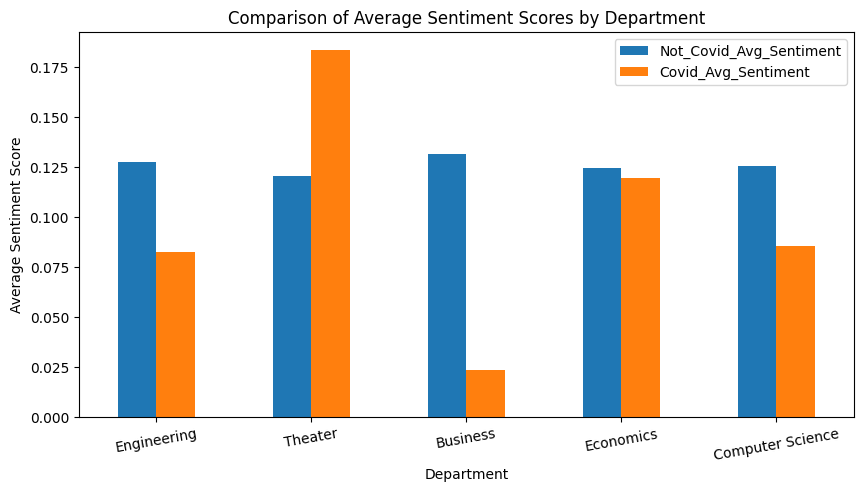

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the average sentiment scores for each department
# engineer, theater, business, economics, computerscience, etc.

# Create a dictionary with the data
Comparied = {
    'Department': ['Engineering', 'Theater', 'Business', 'Economics', 'Computer Science'],
    'Not_Covid_Avg_Sentiment': [not_covid_avg_sentiment_0, not_covid_avg_sentiment_1, not_covid_avg_sentiment_2, not_covid_avg_sentiment_3,not_covid_avg_sentiment_4],  # replace with actual scores
    'Covid_Avg_Sentiment': [covid_avg_sentiment_0, covid_avg_sentiment_1, covid_avg_sentiment_2, covid_avg_sentiment_3, covid_avg_sentiment_4]  # replace with actual scores
}

# Create a DataFrame
df = pd.DataFrame(Comparied)

# Set the index to 'Department' to make plotting easier
df.set_index('Department', inplace=True)

# Plot the data
df.plot(kind='bar', figsize=(10, 5))

# Add some labels and a title
plt.xticks(rotation=10)
plt.ylabel('Average Sentiment Score')
plt.title('Comparison of Average Sentiment Scores by Department')

# Show the plot
plt.show()


### Rating Analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


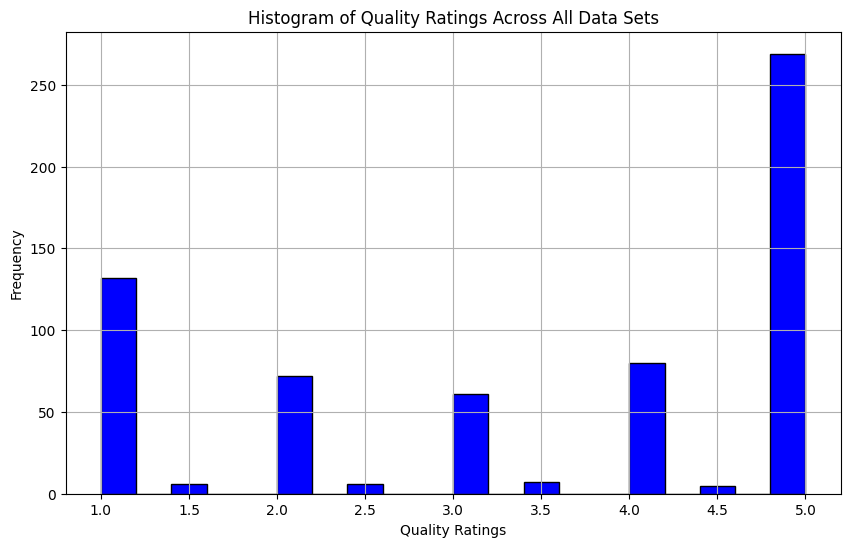

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['Quality'].dropna(), bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Quality Ratings Across All Data Sets')
plt.xlabel('Quality Ratings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
sentiments_df_0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Comment Index,Sentiment Score,post_date,During Covid
0,0,0.350000,2023-09-18,False
1,1,-0.033333,2023-05-25,False
2,2,0.000000,2023-01-21,False
3,3,-0.122917,2022-05-16,True
4,4,-0.024074,2021-09-04,True
...,...,...,...,...
633,633,-0.049405,NaT,False
634,634,0.350000,NaT,False
635,635,0.516667,NaT,False
636,636,0.700000,NaT,False


##Visuzlization WordCloud

In [ ]:
import re
def preprocess_text_word_cloud(text):
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    return " ".join(tokens)

# Apply the preprocessing function
comments = data['comments'].astype(str)
processed_texts_wc = comments.apply(preprocess_text_word_cloud)

# Prepare a list of texts for further processing
texts_wc = [text.split() for text in processed_texts_wc]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
processed_texts_wc_1 = processed_texts_wc.apply(nltk.word_tokenize)
excluded_words = ['class', 'lecture', 'professor', 'student', 'prof', 'course', 'lectures', 'students']

# Now we'll define a function to filter the tokens
def exclude_words(tokens):
    return [token for token in tokens if token not in excluded_words]

# Apply the function to each list of tokens in the Series
filtered_texts = processed_texts_wc_1.apply(exclude_words)

filtered_texts = [' '.join(token) for token in filtered_texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


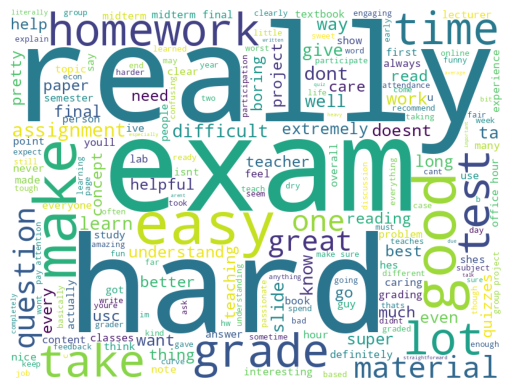

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height=600, background_color  = 'white').generate(''.join(filtered_texts))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


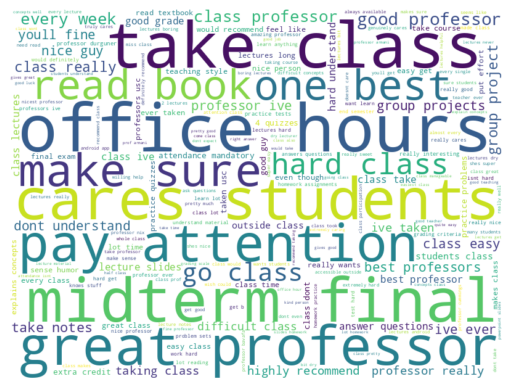

In [ ]:
from nltk.util import ngrams
from collections import Counter

All_texts = ' '.join(processed_texts_wc)  # This converts list to a single string

# Split the string into a list of words
All_texts = All_texts.split(' ')

# Generate bigrams
bigrams = list(ngrams(All_texts, 2))

# Count frequency of bigrams
bigrams_freq = Counter(bigrams)

# Convert tuple bigrams to string format
bigrams_freq_string = {f'{word[0]} {word[1]}': count for word, count in bigrams_freq.items()}

# Generate WordCloud from frequencies
wordcloud_bi = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(bigrams_freq_string)

# Display the generated WordCloud
plt.imshow(wordcloud_bi, interpolation='bilinear')
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


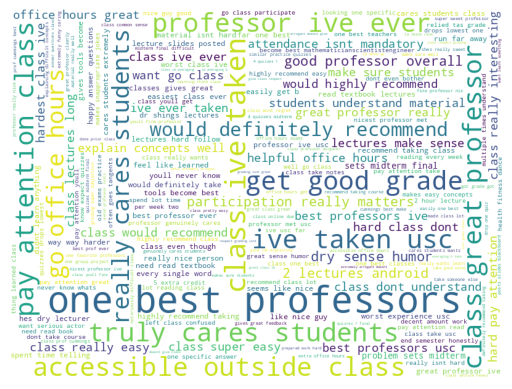

In [ ]:
# Assuming 'processed_texts' is a list of words already processed
All_texts = ' '.join(processed_texts_wc)  # This converts list to a single string

# Split the string into a list of words
All_texts = All_texts.split(' ')

# Generate trigrams
trigrams = list(ngrams(All_texts, 3))

# Count frequency of trigrams
trigrams_freq = Counter(trigrams)

# Convert tuple trigrams to string format
trigrams_freq_string = {f'{word[0]} {word[1]} {word[2]}': count for word, count in trigrams_freq.items()}

# Generate WordCloud from frequencies
wordcloud_tri = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(trigrams_freq_string)

# Display the generated WordCloud
plt.imshow(wordcloud_tri)
plt.axis('off')
plt.show()

##Semantics Analysis

In [ ]:
from gensim import corpora, models
from nltk.tokenize import RegexpTokenizer

# Preprocess
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = tokenizer.tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return tokens

# Preprocessing application
data['Processed Comments'] = data['comments'].apply(preprocess)

# Build dictionary
dictionary = corpora.Dictionary(data['Processed Comments'])

# Build corpus
corpus = [dictionary.doc2bow(text) for text in data['Processed Comments']]

# Train LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10, random_state=42)

# Show topic
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.034*"class" + 0.015*"lecture" + 0.014*"grade" + 0.013*"hard" + 0.013*"professor"')
(1, '0.030*"class" + 0.016*"lecture" + 0.013*"exam" + 0.013*"make" + 0.011*"get"')
(2, '0.033*"class" + 0.028*"professor" + 0.012*"take" + 0.010*"student" + 0.010*"lecture"')
(3, '0.035*"class" + 0.020*"professor" + 0.017*"lecture" + 0.013*"one" + 0.010*"student"')
(4, '0.024*"class" + 0.014*"lecture" + 0.011*"student" + 0.010*"help" + 0.009*"professor"')


### Coherence

In [ ]:
# Join all token
tokens = [''.join(token) for text in data['Processed Comments'] for token in text]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=[tokens], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f"Coherence Score: {coherence_lda}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score: 0.24099673124336002


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


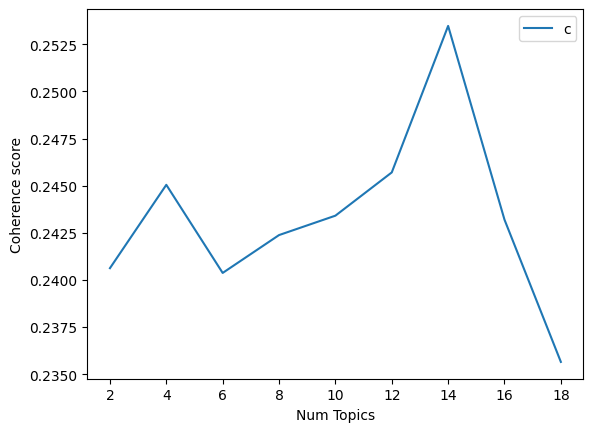

In [ ]:
import gensim
import matplotlib.pyplot as plt
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state = 100)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values

# Compute coherence values
limit=20; start=2; step=2;
coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=[tokens], start=start, limit=limit, step=step)

# Plot
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


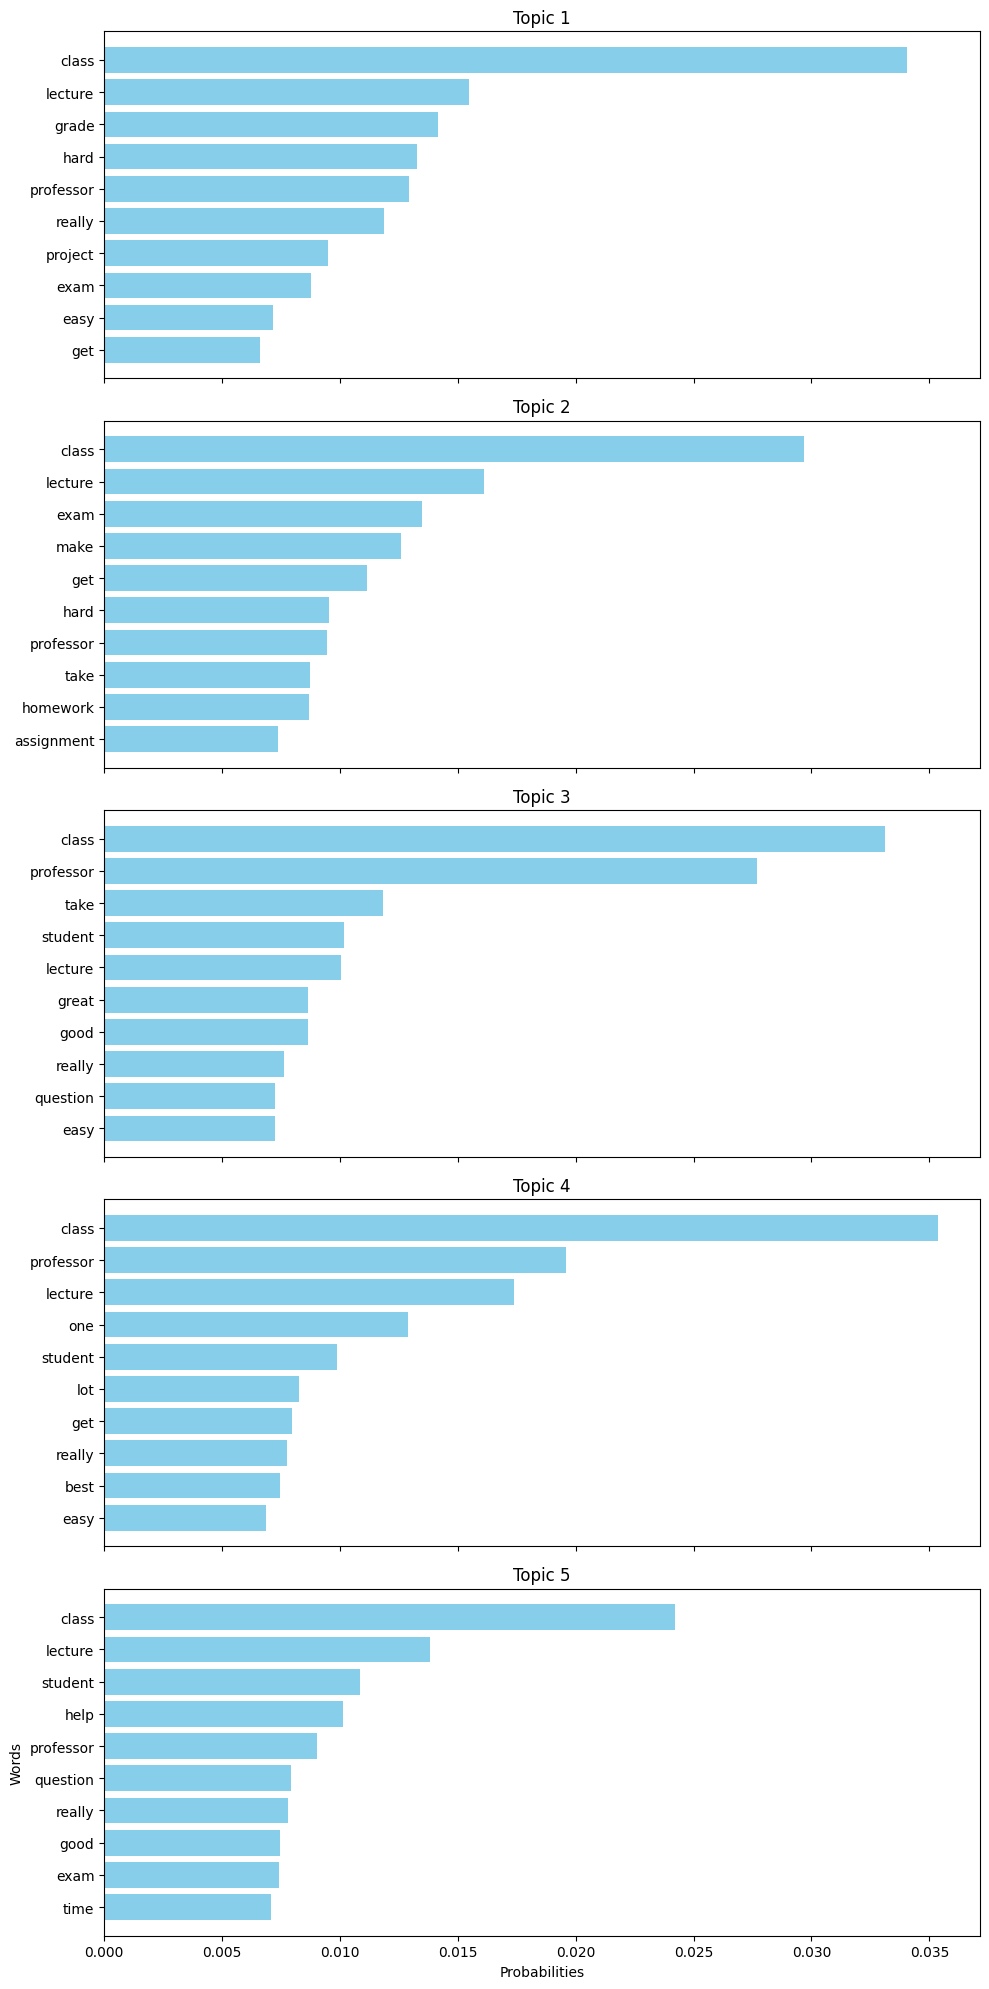

In [ ]:
import matplotlib.pyplot as plt

topics = lda_model.show_topics(num_topics=5, num_words=10, formatted=False)

fig, axes = plt.subplots(5, 1, figsize=(10, 20), sharex=True)
axes = axes.flatten()

for i, topic in enumerate(topics):
    topic_words = dict(topic[1])
    ax = axes[i]
    ax.barh(range(len(topic_words)), list(topic_words.values()), align='center', color='skyblue')
    ax.set_yticks(range(len(topic_words)))
    ax.set_yticklabels(list(topic_words.keys()))
    ax.set_title('Topic ' + str(i+1))
    ax.invert_yaxis()  # Show highest probability words at the top

plt.xlabel('Probabilities')
plt.ylabel('Words')
plt.tight_layout()
plt.show()


New:

Topic 1: Coursework Challenges
This topic seems to revolve around the rigors of academic work. It features terms such as "class," "lecture," "grade," "hard," and "project," which might indicate student discussions about the demanding aspects of their coursework and the structure of their classes.

Topic 2: Assessment Preparation
This topic is characterized by words like "exam" and "assignment," suggesting that the discussion focuses on the evaluative elements of education. It could represent dialogues on the stress and preparations associated with assessments and the process of completing assignments.

Topic 3: Class Evaluation
The focus here appears to be on student sentiment regarding their courses, with positive terms such as "great," "good," and "really" pointing to evaluative commentary on the quality of teaching and the classroom experience.

Topic 4: Educational Experience
With descriptors such as "best," "really," and "lot," this topic may encompass student perspectives on their overall educational journey, sharing personal experiences and highlighting significant aspects of their learning process.

Topic 5: Academic Support
This topic includes words like "help," "question," "time," and "exam," which could relate to discussions about study strategies, time management skills, and the search for academic assistance, possibly reflecting the support structure students rely on during their education.

NOTES:
- The first topic may relate to the difficulty of the course, as it contains words such as "difficult" and "quiz".
- The second topic seems to be related to class and testing and contains "class", "professor" and "quiz".
- The third theme may be related to course evaluation, with positive words such as "great" and "really".
- The fourth topic may be about team work or projects, as there are "group" and "project".
- The fifth topic may be about teaching quality and course grading, as it includes "lecture" and "grade".-

- Try Interactive visualization

In [ ]:
!pip install pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare the visualized data
pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the output
pyLDAvis.display(vis_data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
